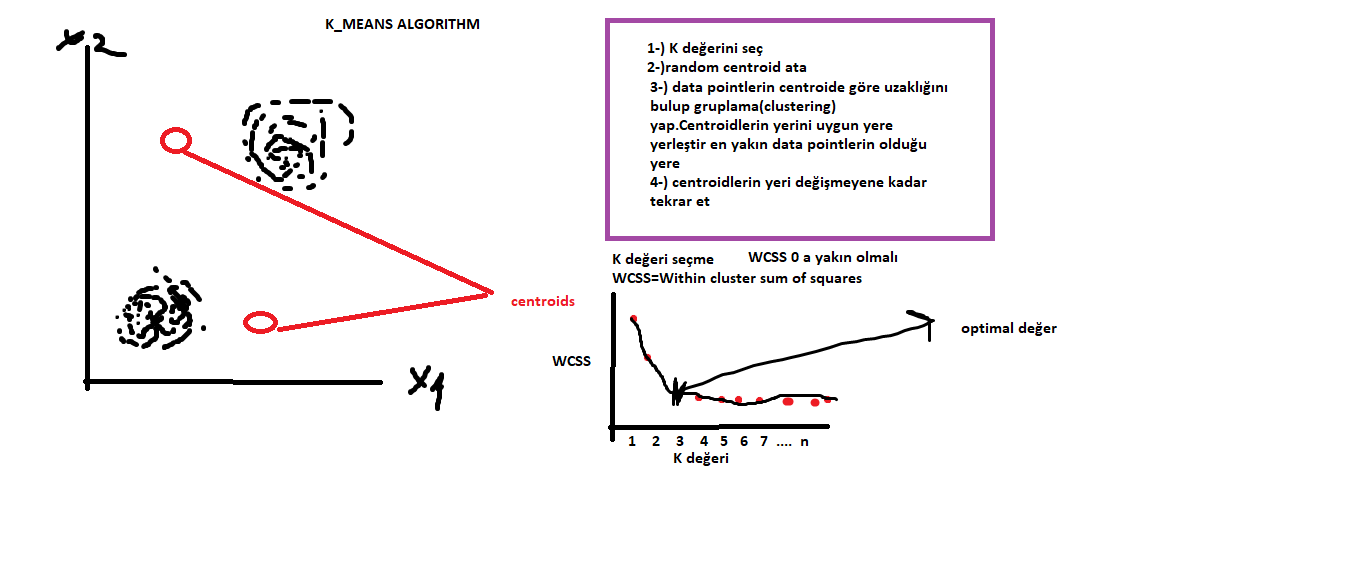

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [20]:
x1=np.random.normal(25,5,1000)
y1=np.random.normal(25,5,1000)

x2=np.random.normal(55,5,1000)
y2=np.random.normal(60,5,1000)

x3=np.random.normal(55,5,1000)
y3=np.random.normal(15,5,1000)

In [21]:
x=np.concatenate((x1,x2,x3),axis=0)
y=np.concatenate((y1,y2,y3),axis=0)

In [22]:
dict={"x":x,"y":y}

In [23]:
df=pd.DataFrame(dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       3000 non-null   float64
 1   y       3000 non-null   float64
dtypes: float64(2)
memory usage: 47.0 KB


# Oluşturduğumuz classların görselleştirmesi(algoritma sınıfları bilmiyor)

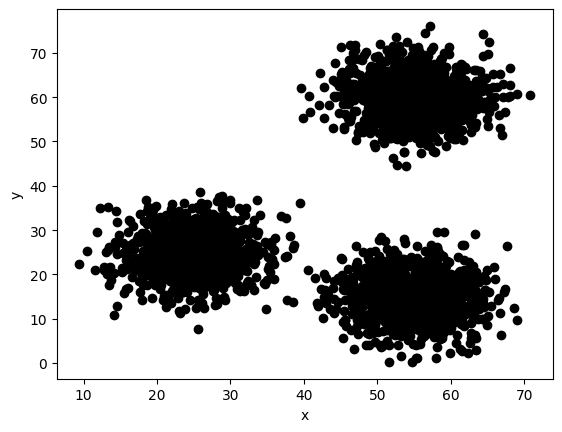

In [24]:
plt.scatter(x1,y1,c="black")
plt.scatter(x2,y2,c="black")
plt.scatter(x3,y3,c="black")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# K-Means Algoritması kullanarak sınıflara ayırmak

* optimal k değeri bulmak

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

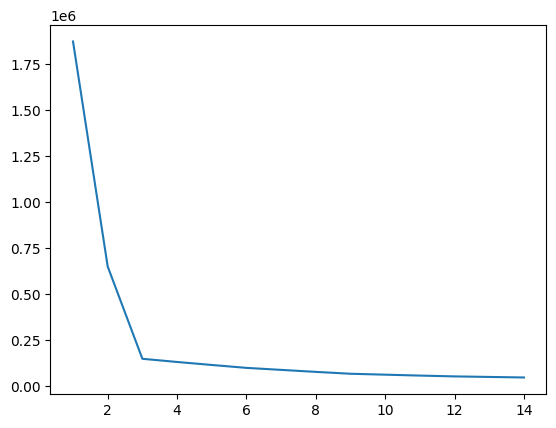

In [28]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,15):
  model=KMeans(n_clusters=i)
  model.fit(df)
  wcss.append(model.inertia_)
plt.plot(range(1,15),wcss)
plt.show()

#k=3 optimal

In [30]:
model=KMeans(n_clusters=3)
model.fit(df)
clusters=model.predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [39]:
df["label"]=clusters
df["label"].value_counts()
df
#0 1 2 diye classlar oluşturdu


,x,y,label
0,25.834009,31.420154,0
1,24.694703,22.839622,0
2,24.405959,26.894008,0
3,26.099167,26.164401,0
4,30.182006,23.797756,0
...,...,...,...
2995,51.714389,15.134115,2
2996,48.918448,14.668715,2
2997,52.609817,21.940216,2
2998,57.905975,12.740127,2


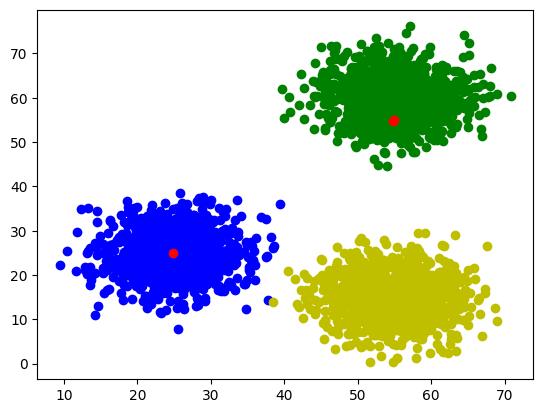

In [47]:
plt.scatter(df["x"][df["label"]==0],df["y"][df["label"]==0],color="b")
plt.scatter(df["x"][df["label"]==1],df["y"][df["label"]==1],color="g")
plt.scatter(df["x"][df["label"]==2],df["y"][df["label"]==2],color="y")
#clusters
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,0],color="r")

In [50]:
df["y"][df["label"]==0]

0      31.420154
1      22.839622
2      26.894008
3      26.164401
4      23.797756
         ...    
995    21.499097
996    28.366508
997    14.181636
998    22.965825
999    25.315384
Name: y, Length: 998, dtype: float64